In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv("C:/Users/MSI/Downloads/archive/Advertising.csv")
dt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dt.shape

(200, 5)

In [4]:
dt.ndim

2

In [5]:
dt.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
dt.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
dt.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
dt.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [10]:
dt.duplicated().sum()

np.int64(0)

In [11]:
dt.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

[Text(0.5, 1.0, 'Correlation Matrix')]

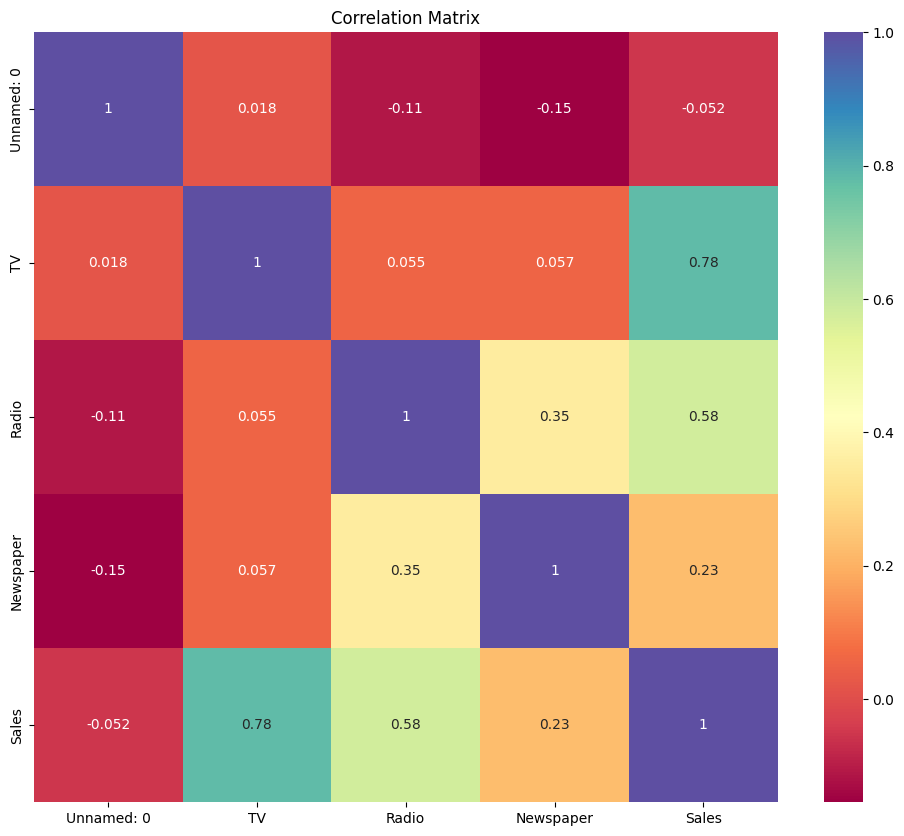

In [12]:
corr = dt.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [13]:
dt.sample(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
176,177,248.4,30.2,20.3,20.2
193,194,166.8,42.0,3.6,19.6
134,135,36.9,38.6,65.6,10.8


In [14]:
y=dt['Sales']
print(y.shape)
print()
y.head()

(200,)



0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [15]:
x=dt.drop(columns=['Sales','TV','Radio','Newspaper'])

In [16]:
x.head()

,Unnamed: 0
0,1
1,2
2,3
3,4
4,5


In [17]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,  train_size=0.7, random_state=1)

In [19]:
print(x.shape)
print(y.shape)
print()
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(200, 1)
(200,)

(140, 1)
(140,)

(60, 1)
(60,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
predict = model.predict(x_test)

In [24]:
predict[:4]

array([14.07531118, 14.19972582, 14.24119737, 13.77118651])

In [25]:
print("Accuracy of training dataset:", model.score(x_train,y_train))
print("Accuracy of test dataset:", model.score(x_test,y_test))

Accuracy of training dataset: 0.005376772430144228
Accuracy of test dataset: -0.030690351238333857


# Actual VS Predicted

In [26]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [27]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})
train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

In [28]:
test.sample(10)

,Y test,Y test predicted
89,16.7,13.861042
35,12.8,14.234285
162,14.9,13.356471
39,21.5,14.206638
27,15.9,14.289581
51,10.7,14.123695
184,17.6,13.204409
38,10.1,14.213550
19,14.6,14.344876
14,19.0,14.379436


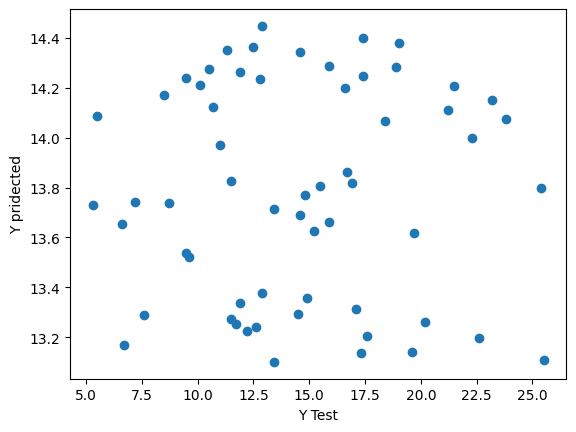

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Y pridected')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
from math import sqrt
print('MAE = ', mean_absolute_error(y_test,predict))

MAE =  4.122587928268269


In [32]:
print('MSE =', mean_squared_error(y_test,predict))

MSE = 25.640171797621907


In [33]:
print('RMSE = ', sqrt(mean_squared_error(y_test,predict)))

RMSE =  5.063612524435682


In [34]:
dt.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [35]:
dt.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


# prediction

In [38]:
user = pd.DataFrame([[31.926272],[11.109461],[37.268959],[2.664034]]) 

In [39]:
result = model.predict(user)
result

C:\Users\MSI\anaconda3\envs\Joya\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.26244274, 14.40632697, 14.2255145 , 14.46470112])